In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Upload CSV files
from google.colab import files
uploaded = files.upload()

Saving b1.csv to b1.csv
Saving b2.csv to b2.csv
Saving b3.csv to b3.csv
Saving b4.csv to b4.csv
Saving b5.csv to b5.csv
Saving b6.csv to b6.csv
Saving b7.csv to b7.csv
Saving b8.csv to b8.csv
Saving b9.csv to b9.csv
Saving b10.csv to b10.csv
Saving b11.csv to b11.csv
Saving b12.csv to b12.csv
Saving b13.csv to b13.csv
Saving b14.csv to b14.csv
Saving b15.csv to b15.csv
Saving b16.csv to b16.csv
Saving b17.csv to b17.csv
Saving b18.csv to b18.csv
Saving b19.csv to b19.csv
Saving b20.csv to b20.csv
Saving b21.csv to b21.csv
Saving b22.csv to b22.csv
Saving b23.csv to b23.csv
Saving b24.csv to b24.csv
Saving b25.csv to b25.csv
Saving b26.csv to b26.csv
Saving b27.csv to b27.csv
Saving b28.csv to b28.csv
Saving b29.csv to b29.csv
Saving b30.csv to b30.csv
Saving b31.csv to b31.csv
Saving b32.csv to b32.csv
Saving b33.csv to b33.csv
Saving b34.csv to b34.csv
Saving b35.csv to b35.csv
Saving b36.csv to b36.csv
Saving b37.csv to b37.csv
Saving b38.csv to b38.csv
Saving b39.csv to b39.csv
Savi

In [4]:
# Step 2: Process each uploaded file and pad sequences
all_data = []
all_labels = []

for filename in uploaded.keys():
    df = pd.read_csv(filename)
    # Check if 'frame' column exists in the dataframe
    if 'frame' not in df.columns:
        # If not, try alternative names like 'Frame'
        if 'Frame' in df.columns:
            df = df.rename(columns={'Frame': 'frame'})
        else:
            # Raise an error if neither column exists
            raise KeyError(f"Neither 'frame' nor 'Frame' column found in {filename}")
    # Continue with the original code
    df = df.iloc[1:]  # Skip the first row (header row)
    df['frame'] = df['frame'].astype(int)  # Ensure 'frame' column is integer
    grouped = df.groupby('frame')  # Group by frame
    for frame, group in grouped:
        if len(group) == 21:  # Ensure there are 21 landmarks per frame
            x_y = group[['X_coordinate', 'Y_coordinate']].values.flatten()
            all_data.append(x_y)
            label = filename.split('_')[0]  # Extract label from filename
            all_labels.append(label)

In [5]:
# Step 3: Pad sequences to ensure equal lengths
max_len = max(len(data) for data in all_data)
all_data = [np.pad(data, (0, max_len - len(data)), mode='constant') for data in all_data]

# Convert data to NumPy array
all_data = np.array(all_data, dtype=float)

In [6]:
# Step 4: Encode labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)
num_classes = len(label_encoder.classes_)

# Convert labels to categorical
all_labels_encoded = tf.keras.utils.to_categorical(all_labels_encoded, num_classes=num_classes)

In [8]:
# Step 5: Adjust timesteps and reshape data
n_samples = all_data.shape[0]
n_features = 42  # Fixed number of features (21 landmarks * 2 coordinates)
n_timesteps = all_data.shape[1] // n_features

if n_timesteps * n_features != all_data.shape[1]:
    # Truncate excess data to fit (timesteps * features)
    all_data = all_data[:, :n_timesteps * n_features]

all_data = all_data.reshape(n_samples, n_timesteps, n_features)

In [9]:
# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels_encoded, test_size=0.2, random_state=42)

In [10]:
# Step 6: Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(n_timesteps, n_features)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 128)                 │          54,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │             957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,869 (233.86 KB)

 Trainable params: 59,869 (233.86 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test))

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2032 - loss: 2.9493 - val_accuracy: 0.2903 - val_loss: 2.4780
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3548 - loss: 2.3197 - val_accuracy: 0.4194 - val_loss: 2.1825
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3909 - loss: 2.1742 - val_accuracy: 0.3952 - val_loss: 2.1434
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3601 - loss: 2.0147 - val_accuracy: 0.4355 - val_loss: 2.0781
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3994 - loss: 2.1081 - val_accuracy: 0.4274 - val_loss: 2.1621
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3767 - loss: 2.0956 - val_accuracy: 0.4194 - val_loss: 2.0104
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4190 - loss: 1.9520 - val_accuracy: 0.4435 - val_loss: 2.0960
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3958 - loss: 2.0202 - val_accuracy: 0.

In [12]:
# Step 9: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to labels

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted', zero_division=1)

print("Test Accuracy:", round(accuracy, 4))  # Rounded to 4 decimal places
print("Test Precision:", round(precision, 4))

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step
Test Accuracy: 0.379
Test Precision: 0.7546


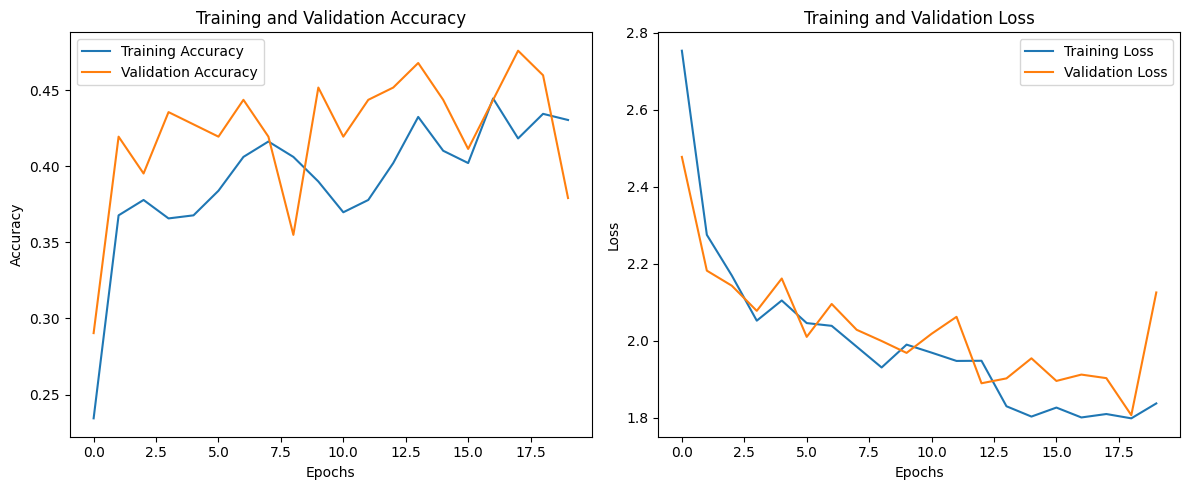

In [13]:
# Step 10: Plot training and validation metrics
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

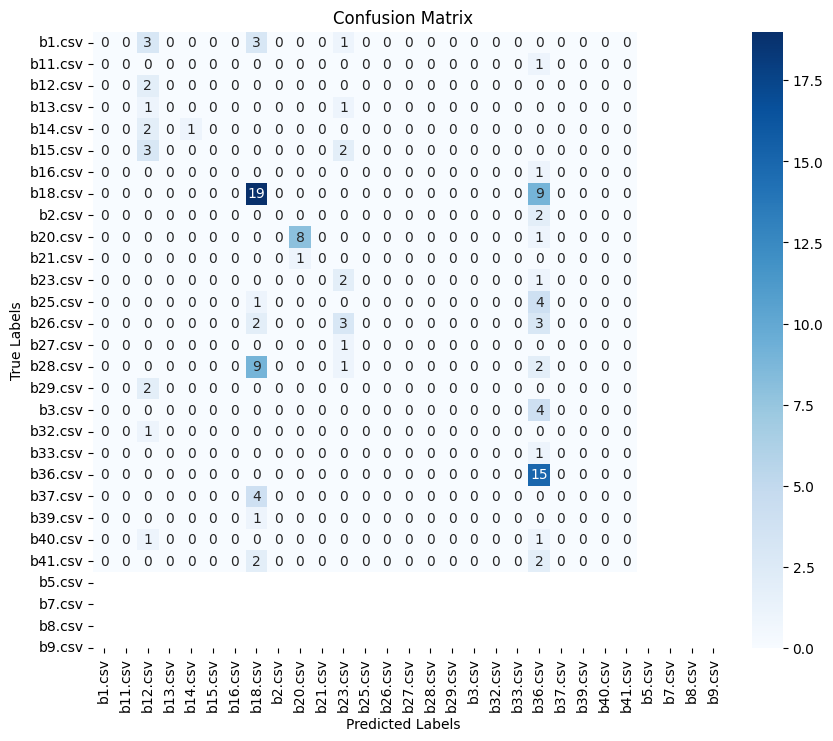

In [14]:
# Step 11: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()